In [1]:
%matplotlib inline 

# Introduccion

Las personas involucradas en el desarrollo de la bomba atomica se encontraron con problemas complejos y con sistemas con comportamientos aleatorios.
Debido a esto no era factible intentar llegar a soluciones 100% exactas, sino que era necesario realizar estimaciones.
El metodo de montecarlo fue creado como herramienta de investigacion para resolver este tipo de problemas, 
no deterministicos. La utilidad del metodo de montecarlo esta relacionada a la continua mejora de los computadores y
la capacidad de computo de estos.


# Numero PI

PI es la relacion entre la longitud y diametro de una circunferencia.
Su numero a sido aproximado a traves de la historia, y es una de las constantes mas utilizadas, junto con el numero e.

Arquimides lo calculo con la aproximacion

$3 + \dfrac{10}{71} < pi < 3 + \dfrac{1}{7}$

En el antiguo Egipto se aproximaba el valor de pi, con la idea de que 
el area de un circulo es similar a la de un cuadrado que su lado es igual a  $\dfrac{8}{9}$  del diametro del circulo.

En Mesopotamia (1900 a. C.) aproximaban pi con  $pi = 3 + \dfrac{1}{8}$

En el siglo II Claudio Ptolomeo aproximo pi con $pi = \dfrac{377}{120}$

## Epoca moderna
Actualmente mediante el uso de computadores es posible calcular con mucha mas precision el valor de pi. El descubrimiento de estas cifras se acelero junto con el desarrollo de la computacion. Desde 1949 donde se obtuvieron $2037$ cifras, al 2011 donde se llego a calcular $10.000.000.000.000$ cifras de pi.

### Estimar pi con el metodo de montecarlo

Este metodo consiste en tener un circulo y un cuadrado cuyo centro se encuentra en el mismo punto, 
osea que el circulo esta inscrito dentro del cuadrado.
El largo de los lados del cuadrado y el radio del circulo siguen la siguiente proporcion:

Luego se comienzan a generar puntos aleatorios y se verifica si estos puntos se encuentran o no dentro del
circulo. A partir del numero de puntos dentro del circulo (M), el numero total de puntos generados (N) y PI, se 
tiene la siguiente igualdad:



$\dfrac{N}{M} = \dfrac{AreaCuadrado}{AreaCirculo} = \dfrac{(r*2)^2}{pi * r^ 2} = \dfrac{4}{pi}$

A partir de esta igualdad se obtiene π

$pi = 4 * \dfrac{M}{N}$


$M = numero de puntos dentro del circulo$
$N = numero total de puntos generados$

#### Codigo simulacion

In [1]:
import matplotlib.pyplot as plt
import random
import math

In [2]:
radio_circulo = 1
lado_cuadrado = 2 * radio_circulo

In [3]:
def punto_dentro_circulo(x, y, centro_circulo):
    return x**2+y**2 <= centro_circulo

In [4]:
def estimar_pi(n):
    puntos_dentro_circulo = 0

    for i in range(n):
        x = random.randrange(0, lado_cuadrado)
        y = random.randrange(0, lado_cuadrado)
    
        if punto_dentro_circulo(x, y, radio_circulo):
            puntos_dentro_circulo += 1
        
    return round(4 * puntos_dentro_circulo / n, 3)

In [5]:
n = 3 * (10 ** 3)

In [6]:
estimaciones = [estimar_pi(n) for n in range(100, n)]

#### 10 Mejores estimaciones

In [7]:
for i, e in enumerate(estimaciones[-10:]):
    print(f"{i} : {e}")

0 : 3.037
1 : 3.002
2 : 3.051
3 : 3.05
4 : 3.031
5 : 2.98
6 : 3.013
7 : 3.003
8 : 3.022
9 : 3.006


#### Grafico estimaciones

En el primer grafico se puede observar que mientras mayor es el numero de puntos que se genera,
menor es el error al momento de estimar $pi$

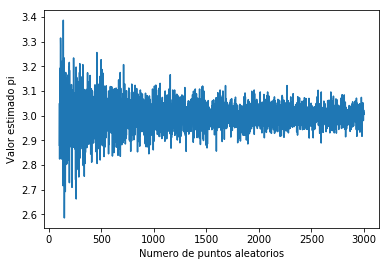

In [8]:
fig = plt.figure()
plt.plot(list(range(100, n)), estimaciones)
plt.xlabel("Numero de puntos aleatorios")
plt.ylabel("Valor estimado pi")
print()

En el segundo grafico se muestran en verde los puntos generados dentro del circulo y en 
rojo los puntos fuera del circulo, para una simulacion en la que se generaron 3000 puntos.

Dentro del circulo 2350
Fuera del circulo 650



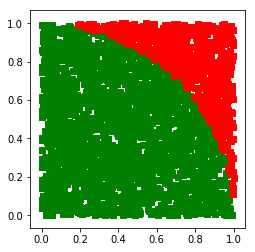

In [9]:
x_inside = []
y_inside = []
x_outside = []
y_outside = []
inside = 0

for _ in range(n):
    x = random.random()
    y = random.random()
    if punto_dentro_circulo(x, y, radio_circulo):
        inside += 1
        x_inside.append(x)
        y_inside.append(y)
    else:
        x_outside.append(x)
        y_outside.append(y)

print(f"Dentro del circulo {inside}")
print(f"Fuera del circulo {n - inside}")
        
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.scatter(x_inside, y_inside, color='g', marker='s')
ax.scatter(x_outside, y_outside, color='r', marker='s')
print()

### Estimar pi con el metodo de buffon

Se tiene en un plano varias lineas, rectas y paralelas, que estan separadas por una distancia $D$.
Luego se deja caer sobre el plano una o mas agujas de largo $L <= D$.
Cuando se a terminado de dejar caer las agujas, es necesari verificar cuanta cayeron sobre una linea, esto
se considerara un acierto $A$.

Para estimar el valor de pi se tiene la siguiente igualdad:

Si $L = D => pi = \dfrac{2N}{A}$

Si $L < D => pi = \dfrac{2NL}{AD}$

Donde $N$ es el numero total del agujas que se dejaron caer.

#### Codigo simulacion

In [10]:
import matplotlib.pyplot as plt
import random
import math

N = 1 * (10 ** 3)
D = 2
L = 2

In [11]:
def estimar_pi(n):
    A = 0
    
    for i in range(n):
        distancia_aguja = round(random.uniform(0, 1), 10) * (L/2)
        angulo_aguja = math.radians(random.uniform(0, 1) * 90)

        if distancia_aguja <= (L/2) * math.sin(angulo_aguja):
            A += 1
    # Cuando se intenta muy pocas veces es posible que ningua aguja este sobre una linea
    if A == 0:
        return 0
    elif L < D:
        return (2 * N * L) / (A * D)
    elif L == D:
        return (2 * N) / A

In [12]:
estimaciones = [estimar_pi(n) for n in range(1, N)]

#### 10 mejores estimaciones

In [13]:
for e in estimaciones[-10:]:
    print(e)

3.284072249589491
3.2626427406199023
3.231017770597738
3.1847133757961785
3.1201248049921997
3.0721966205837172
3.1545741324921135
3.1645569620253164
3.225806451612903
3.1595576619273302


#### Graficos

En el siguiente grafico se puede ver como a medida que mas agujas se dejan caer,
mas se acerca al valor real de pi la estimacion.
Ademas si el numero de agujas utilizadas es muy pequeño (< 200), la estimacion tiene demasiado error.

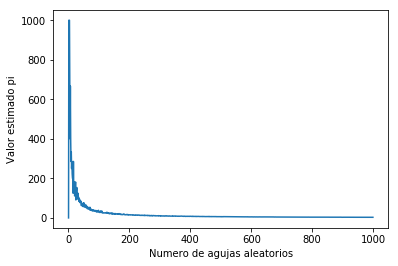

In [14]:
fig = plt.figure()
plt.plot(list(range(1, N)), estimaciones)
plt.xlabel("Numero de agujas aleatorios")
plt.ylabel("Valor estimado pi")
print()

# Conclusion

La creacion de los computadores permitio obtener con una exactitud mucho mayor el valor de pi,
ademas los metodos de simulacion, como el metodo de montecarlo permiten estimar con mayor exactitud valores que de otra
manera serian muy costosos de obtener. Mientras mas iteraciones se realizen, mas exactas seran las estimaciones.

Aunque en este trabajo solo se realizaron simples aproximaciones al numero pi, la estadistica y computacion tienen
una capacidad de inferir informacion que abarca muchas mas areas, al realizar modelos de sistemas complejos es
posible predecir el comportamiento de estos.